In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# import classy module
%autoreload 2
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Comparison between New HyREC Default, Model with $A_r$ and RECFAST Default

In [42]:
# create instance of the class "Class"
from classy import Class

hyrecLCDM = Class()

hyrecLCDM.set({
    'recombination': 'hyrec',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

hyrecLCDM.compute()

hyrec_new = Class()

hyrec_new.set({
    'recombination': 'hyrec',
    'Alpha_inf hyrec file': '../hyrec/data/Alpha_Ar_400_beta_-2.6_n_250.dat',
    'Beta_inf hyrec file':  '../hyrec/data/Beta_Ar_400_beta_-2.6_n_250.dat',
    'R_2pto2s hyrec file':  '../hyrec/data/RR_2pto2s_Ar_400_beta_-2.6_n_250.dat',
    'R_2sto2p hyrec file':  '../hyrec/data/RR_2sto2p_Ar_400_beta_-2.6_n_250.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

hyrec_new.compute()

recfastLCDM = Class()
# pass input parameters

recfastLCDM.set({
    'recombination': 'recfast',
#     'recombination': 'hyrec',
#     'Alpha_inf hyrec file': '../hyrec/Alpha_BB_n_250_fine.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})


# run class

recfastLCDM.compute()

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$(C_\\ell - C_\\ell^\\mathrm{ref})/C_\\ell^\\mathrm{ref} [\\%]$')

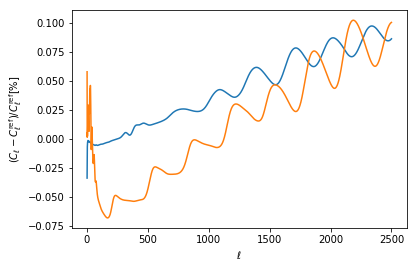

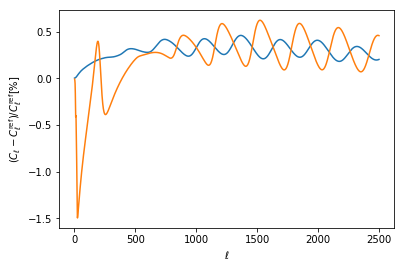

In [43]:
cls_hyrec   = hyrecLCDM.lensed_cl(2500)
cls_new     = hyrec_new.lensed_cl(2500)
cls_recfast = recfastLCDM.lensed_cl(2500)

ll_vec_hyrec   = cls_hyrec['ell']
ll_new         = cls_new['ell']
ll_vec_recfast = cls_recfast['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_hyrec,   (cls_hyrec['tt']/cls_recfast['tt'] - 1.)*100)
plt.plot(ll_vec_hyrec,   (cls_hyrec['ee']/cls_recfast['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_hyrec,   (cls_new['tt']/cls_hyrec['tt'] - 1.)*100)
plt.plot(ll_vec_hyrec,   (cls_new['ee']/cls_hyrec['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

## Comparison between New HyREC and Default CLASS HyREC 

The difference is that we are now interpolating over just $T_R$, and with the current files calculated up to $n = 250$ only with no interpolation to infinity. There should be small numerical differences, but as long as the difference is on the same order as RECFAST, that's fine.

In [19]:
hyrecLCDM_z = hyrecLCDM.get_thermodynamics()['z']
hyrecLCDM_xe = hyrecLCDM.get_thermodynamics()['x_e']

In [20]:
z_xe_old = np.loadtxt('/Users/hongwan/desktop/LambdaCDM_z_xe.dat')

In [25]:
hyrecLCDM_xe_interp = np.exp(np.interp(z_xe_old[:,0], hyrecLCDM_z, np.log(hyrecLCDM_xe)))

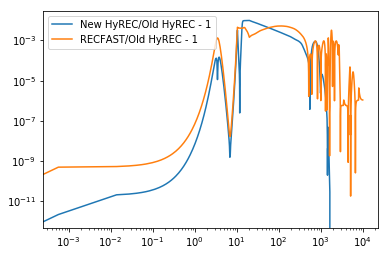

In [28]:
plt.figure()

plt.loglog()

plt_frac_diff_new, = plt.plot(z_xe_old[:,0], np.abs((hyrecLCDM_xe_interp - z_xe_old[:,1])/z_xe_old[:,1]), label='New HyREC/Old HyREC - 1')
plt_frac_diff_recfast, = plt.plot(z_xe_old[:,0], np.abs((recfastLCDM.get_thermodynamics()['x_e'] - z_xe_old[:,1])/z_xe_old[:,1]), label='RECFAST/Old HyREC - 1')

plt.legend()

In [44]:
l_Cltt_Clee_old = np.loadtxt('/Users/hongwan/desktop/LambdaCDM_l_Cltt_Clee.dat')

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


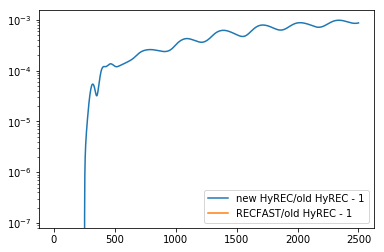

In [45]:
plt.figure()

ax = plt.gca()
ax.set_yscale('log')

# plt.axis([1, 2500, 1e-20, 1e-11])

ratio_hyrec = cls_hyrec['tt']/l_Cltt_Clee_old[:,1]
ratio_recfast = cls_recfast['tt']/l_Cltt_Clee_old[:,1]

plt_Cls_compare_hyrec, = plt.plot(ll_vec_hyrec, ratio_hyrec-1, label='new HyREC/old HyREC - 1')
plt_Cls_compare_recfast, = plt.plot(ll_vec_recfast, ratio_recfast-1, label='RECFAST/old HyREC - 1')
plt.legend()

In [46]:
cls_recfast['tt']/l_Cltt_Clee_old[:,1] - 1

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan, nan,  0., ...,  0.,  0.,  0.])

In [47]:
cls_recfast['tt'] == l_Cltt_Clee_old[:,1]

array([ True,  True,  True, ...,  True,  True,  True])